# 목표
- 9가지 카테고리로 데이터를 나눈다.

In [0]:
import pandas as pd
import numpy as np
import os
os.chdir('/content/drive/My Drive/tabditor/FromZero/rsc')

# 데이터 준비

In [3]:
# coverletter 질문 & 답변 데이터 
train = pd.read_csv('labeled_qus_data')

print(train.shape)
train.head()

(11522, 7)


,Unnamed: 0,Unnamed: 0.1,index,qus,ans,prep_qus,label
0,667,1085,9269,[Olive Young과 함께 마음까지 All live young하는 삶을 꿈꾸다],\n제가 올리브영에 입사하고 싶은 이유는 올리브영만의 기업철학이 제가 지향하는 삶의...,OliveYoung과함께마음까지Allliveyoung하는삶을꿈꾸다,[1]
1,1128,1880,17155,경쟁과 협력 가운데 더 중요하다고 생각하는 것,\r\n무한경쟁시대일수록 역설적으로 협력의 힘이 더욱 중요하다고 생각합니다. 함께 ...,경쟁과협력가운데더중요하다고생각하는것,[1]
2,1210,1934,14203,고졸(일반행정) 분야 지원 동기와 입사 후 계획을 기술해 주십시오.,\n금융실무 수업시간을 통해 금융기관을 배우며 예금보험공사를 처음으로 접하게 되었습...,고졸일반행정분야지원동기와입사후계획을기술해주십시오,[3]
3,1211,1935,14233,고졸(일반행정)분야 지원 동기와 입사 후 계획을 기술해주십시오. (1000자이내),\r\n수호천사가 되고 싶은 꿈을 이루기 위해 지원하게 되었습니다. 저는 존재 자체...,고졸일반행정분야지원동기와입사후계획을기술해주십시오1000자이내,[3]
4,1212,1154,9623,[고퀄리티 제품과 서비스를 갖춘 GS엠비즈의 고퀄리티 영업관리자가 되겠습니다],"\r\nGS엠비즈는 ""The Best Company for Customers""를 비...",고퀄리티제품과서비스를갖춘GS엠비즈의고퀄리티영업관리자가되겠습니다,[1]


In [0]:
train.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11522 entries, 0 to 11521
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     11522 non-null  int64 
 1   qus       11522 non-null  object
 2   ans       11522 non-null  object
 3   prep_qus  11522 non-null  object
 4   label     11522 non-null  object
dtypes: int64(1), object(4)
memory usage: 450.2+ KB


# data preprocessing

## label data cleaning

In [0]:
train.label = train.label.apply(lambda x : x.replace(' ',','))

In [0]:
import re

pat = re.compile('[^0-9 ]')
prepro_label = train.label.apply(lambda x: pat.sub('',x))
prepro_label = prepro_label.apply(lambda x : x.replace(' ',','))

In [0]:
train['prepro_label'] = prepro_label

In [44]:
train.head()

,index,qus,ans,prep_qus,label,prepro_label,prepro_ans
0,9269,[Olive Young과 함께 마음까지 All live young하는 삶을 꿈꾸다],\n제가 올리브영에 입사하고 싶은 이유는 올리브영만의 기업철학이 제가 지향하는 삶의...,OliveYoung과함께마음까지Allliveyoung하는삶을꿈꾸다,[1],1,제가 올리브영에 입사하고 싶은 이유는 올리브영만의 기업철학이 제가 지향하는 삶의 방...
1,17155,경쟁과 협력 가운데 더 중요하다고 생각하는 것,\r\n무한경쟁시대일수록 역설적으로 협력의 힘이 더욱 중요하다고 생각합니다. 함께 ...,경쟁과협력가운데더중요하다고생각하는것,[1],1,무한경쟁시대일수록 역설적으로 협력의 힘이 더욱 중요하다고 생각합니다 함께 힘을 합친...
2,14203,고졸(일반행정) 분야 지원 동기와 입사 후 계획을 기술해 주십시오.,\n금융실무 수업시간을 통해 금융기관을 배우며 예금보험공사를 처음으로 접하게 되었습...,고졸일반행정분야지원동기와입사후계획을기술해주십시오,[3],3,금융실무 수업시간을 통해 금융기관을 배우며 예금보험공사를 처음으로 접하게 되었습니다...
3,14233,고졸(일반행정)분야 지원 동기와 입사 후 계획을 기술해주십시오. (1000자이내),\r\n수호천사가 되고 싶은 꿈을 이루기 위해 지원하게 되었습니다. 저는 존재 자체...,고졸일반행정분야지원동기와입사후계획을기술해주십시오1000자이내,[3],3,수호천사가 되고 싶은 꿈을 이루기 위해 지원하게 되었습니다 저는 존재 자체로 믿음과...
4,9623,[고퀄리티 제품과 서비스를 갖춘 GS엠비즈의 고퀄리티 영업관리자가 되겠습니다],"\r\nGS엠비즈는 ""The Best Company for Customers""를 비...",고퀄리티제품과서비스를갖춘GS엠비즈의고퀄리티영업관리자가되겠습니다,[1],1,GS엠비즈는 The Best Company for Customers를 비전으로 자동...


## answer data cleaning

In [0]:
# 답변 데이터 cleaning
ans_cleaner = re.compile('[^가-힣a-zA-Z0-9 ]')
prepro_ans = train.ans.apply(lambda x : ans_cleaner.sub('',x))

In [23]:
prepro_ans

0        제가 올리브영에 입사하고 싶은 이유는 올리브영만의 기업철학이 제가 지향하는 삶의 방...
1        무한경쟁시대일수록 역설적으로 협력의 힘이 더욱 중요하다고 생각합니다 함께 힘을 합친...
2        금융실무 수업시간을 통해 금융기관을 배우며 예금보험공사를 처음으로 접하게 되었습니다...
3        수호천사가 되고 싶은 꿈을 이루기 위해 지원하게 되었습니다 저는 존재 자체로 믿음과...
4        GS엠비즈는 The Best Company for Customers를 비전으로 자동...
                               ...                        
11517    저는  태권도 동아리 소속의 아낌없이 가르쳐주고 소통하는 멘토입니다에 입학 후 건강...
11518    마이스터고를 재학 중 3학년이 되어 현장실습을 OOOO중공업으로 나가게 되었습니다 ...
11519    근성으로 해낸 초록마을 아르바이트 2014년 OOOO에서 3개월 동안 매장관리와 제...
11520    병원에 입원해 본 사람은 매 시간이 얼마나 감사한지 알 것입니다 사고로 군용 차량과...
11521    병원에 입원해 본 사람은 매 시간이 얼마나 감사한지 알 것입니다 사고로 군용 차량과...
Name: ans, Length: 11522, dtype: object

In [0]:
train['prepro_ans'] = prepro_ans

In [25]:
train.head()

,index,qus,ans,prep_qus,label,prepro_label,prepro_ans
0,9269,[Olive Young과 함께 마음까지 All live young하는 삶을 꿈꾸다],\n제가 올리브영에 입사하고 싶은 이유는 올리브영만의 기업철학이 제가 지향하는 삶의...,OliveYoung과함께마음까지Allliveyoung하는삶을꿈꾸다,[1],1,제가 올리브영에 입사하고 싶은 이유는 올리브영만의 기업철학이 제가 지향하는 삶의 방...
1,17155,경쟁과 협력 가운데 더 중요하다고 생각하는 것,\r\n무한경쟁시대일수록 역설적으로 협력의 힘이 더욱 중요하다고 생각합니다. 함께 ...,경쟁과협력가운데더중요하다고생각하는것,[1],1,무한경쟁시대일수록 역설적으로 협력의 힘이 더욱 중요하다고 생각합니다 함께 힘을 합친...
2,14203,고졸(일반행정) 분야 지원 동기와 입사 후 계획을 기술해 주십시오.,\n금융실무 수업시간을 통해 금융기관을 배우며 예금보험공사를 처음으로 접하게 되었습...,고졸일반행정분야지원동기와입사후계획을기술해주십시오,[3],3,금융실무 수업시간을 통해 금융기관을 배우며 예금보험공사를 처음으로 접하게 되었습니다...
3,14233,고졸(일반행정)분야 지원 동기와 입사 후 계획을 기술해주십시오. (1000자이내),\r\n수호천사가 되고 싶은 꿈을 이루기 위해 지원하게 되었습니다. 저는 존재 자체...,고졸일반행정분야지원동기와입사후계획을기술해주십시오1000자이내,[3],3,수호천사가 되고 싶은 꿈을 이루기 위해 지원하게 되었습니다 저는 존재 자체로 믿음과...
4,9623,[고퀄리티 제품과 서비스를 갖춘 GS엠비즈의 고퀄리티 영업관리자가 되겠습니다],"\r\nGS엠비즈는 ""The Best Company for Customers""를 비...",고퀄리티제품과서비스를갖춘GS엠비즈의고퀄리티영업관리자가되겠습니다,[1],1,GS엠비즈는 The Best Company for Customers를 비전으로 자동...


# Category 분류
- 9가지 카테고리별로 따로 학습을 진행하기 위해 질문 카테고리에 맞는 데이터로 분류

1	성장과정  
2	성격 장단점, 생활신조 / 윤리의식(환경, 직업윤리)  
3	직무역량(강점만 어필하는 느낌) / 강약점(직무상의 강약점, 학과, 자격증, 수강과목 따라서 이런일에 역량을 발휘할 수 있습니다.)  
4	지원동기 및 입사후 포부 / 입사를 위한 준비과정 / 회사 이해도(어떤 사업을 하고 있는지, 혁신(입사 후 제안 서비스))  
5	사회경험(인턴, 동아리, 공모전, 봉사활동, 아르바이트 및 학창시절) / 도전, 성취 경험 /   
6	경력사항(일을 했던 경력)  
7<자신 외적에 관한 내용>	  
7	사회이슈(사회의 특정 사건에 대해서 어떤 견해를 가지고 있는지)
<자신과 타인에 관한 내용>	  
8	조직적응력, 사회성(대인관계) > 팀워크 / 소통(이견있을 때 어떻게 해결? / 리더십)  
9	문제해결력(의사결정-상사가 지시한 일/ 시한이 급한 일 어떤 일에 우선순위를 둘 것인가, 시나리오 문제), 정보능력(잘 안나올 것같음)

In [0]:
os.chdir('/content')

In [34]:
!git init

Initialized empty Git repository in /content/.git/


In [0]:
!git remote add origin https://github.com/dbsgh3344/AI-Coverletter-Assistant.git

In [36]:
!git pull origin fromzero

remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 296 (delta 25), reused 14 (delta 8), pack-reused 250
Receiving objects: 100% (296/296), 431.81 KiB | 5.61 MiB/s, done.
Resolving deltas: 100% (102/102), done.
From https://github.com/dbsgh3344/AI-Coverletter-Assistant
 * branch            fromzero   -> FETCH_HEAD
 * [new branch]      fromzero   -> origin/fromzero


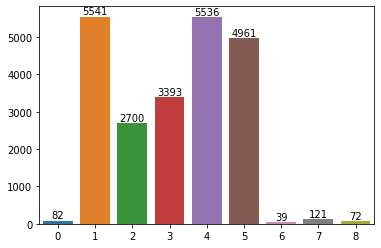

In [52]:
# Utils의 init.py 파일은 지워준다. 
from Utils import transform_label
a= transform_label.manyhot_label(train.label)
transform_label.label_visualize(a)

- category count를 보면 0,6,7,8은 데이터가 너무 적으니 생략한다

In [0]:
label_1 = train[train.prepro_label.str.contains('1')]
label_2 = train[train.prepro_label.str.contains('2')]
label_3 = train[train.prepro_label.str.contains('3')]
label_4= train[train.prepro_label.str.contains('4')]
label_5 = train[train.prepro_label.str.contains('5')]

In [57]:
label_1.shape,label_2.shape,label_3.shape,label_4.shape,label_5.shape,

((5541, 7), (2700, 7), (3393, 7), (5536, 7), (4961, 7))

In [0]:
label_1.to_csv('/content/drive/My Drive/tabditor/FromZero/rsc/label_1.csv',index=False)

In [0]:
label_2.to_csv('/content/drive/My Drive/tabditor/FromZero/rsc/label_2.csv',index=False)
label_3.to_csv('/content/drive/My Drive/tabditor/FromZero/rsc/label_3.csv',index=False)
label_4.to_csv('/content/drive/My Drive/tabditor/FromZero/rsc/label_4.csv',index=False)
label_5.to_csv('/content/drive/My Drive/tabditor/FromZero/rsc/label_5.csv',index=False)
